# **Análise de dados a partir de informações do universo de StarWars.**

Irei utilizar algumas bibliotecas para o tratamento de dados, como de costume, irei utilizar a biblioteca **PANDAS** importado como **pd**, segue link para documentação: https://pandas.pydata.org/docs/user_guide/index.html

Também usaremos outra biblioteca para que possamos inserir informações gráficas referente à nossa análise, são elas: **MATPLOTLIB** e **SEABORN**.



*   https://matplotlib.org/devdocs/tutorials/introductory/quick_start.html
*   https://seaborn.pydata.org/introduction.html



Para essa analise utilizaremos alguns informativos que compõe esta *database*, são elas:

*   **Characters**: Indica características dos personagens.
*   **Planets**: Indica características dos planetas
*   **Species**: Indica características das espécies
*   **Starships**: Indica características das naves usadas
*   **Vehicles**: Indica características dos veículos usados.

Faremos as importações das bibliotecas e em seguida olharemos o primeiro dataset que iremos avaliar. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Como um grande entusiasta de filmes e ficção, estarei abordando este tema para o meu primeiro projeto, dataset é originário do Kaggle: https://www.kaggle.com/datasets/jsphyg/star-wars

In [ ]:
df = pd.read_csv('/content/characters.csv', sep=',')

Usarei agora um **.head()** para que possamos ter vislumbre do que se trata esse dataset, como suas linhas e colunas.
Estarei limitando a uma quantidade de **10**, desta formando evitando carregar todo o dataset.

In [ ]:
df.head(100)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human
...,...,...,...,...,...,...,...,...,...,...
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,NaN,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,NaN,Human
84,BB8,NaN,NaN,none,none,black,NaN,none,NaN,Droid
85,Captain Phasma,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN


Obtendo essa visão conseguimos notar algumas informações que seriam relevantes para nossa análise, são elas:

1.   **Gender**: Identificação sexo dos personagens
2.   **Homeworld**: Origem de nascimento dos personagens
3.   **Species**: Que tipo raça são
4.   **Name**: Nome dos personagens


Vamos verificar neste momento quantas raças possuimos, porém faremos antes umas trativas pois como podemos observar, temos informações duplicadas.
Desta forma utilizaremos a função **.drop_duplicates()**

In [ ]:
race = df["species"]
race.drop_duplicates(inplace=True)
race.dropna()
race.count()

37

Utilizando a função **.count()**, identificamos que temos **37 espécies diferentes** em nosso dataset

No codigo abaixo utilizei o metodo **.groupby** selecionando a coluna homeworld e definindo o metodo de contagem de especies distintas por planeta, obtivemos o resultado abaixo.

In [ ]:
df.groupby('homeworld').agg({'species':'count'})

,species
homeworld,
Alderaan,3
Aleen Minor,1
Bespin,1
Bestine IV,1
Cato Neimoidia,1
Cerea,1
Champala,1
Chandrila,1
Concord Dawn,1


--------------------------------------------------------------------------------

Neste momento estarei selecionando apenas a coluna **homeworld** para que possamos verificar quantos mundos estão presentes nesse dataset, onde encontramos 48 **Mundos** diferentes

In [ ]:
world = df['homeworld']
world.drop_duplicates(inplace=True)
world.count()

48

Com esta quantidade de especies, podermos observar logo abaixo que o top 5 de mundos presentes nesse dataset, trata-se de: **Naboo, Tatooine, Alderaan, Kamino e Coruscant**

In [ ]:
df["homeworld"].value_counts(normalize=True).round(3).head()

Naboo        0.143
Tatooine     0.130
Alderaan     0.039
Kamino       0.039
Coruscant    0.039
Name: homeworld, dtype: float64

Logo abaixo utilizei a função .loc para criação de um novo **DATAFRAME**, intitulado de DF5 em referencia ao nosso **TOP5** e logo em seguida utilizei a função **.head()** afim de verificar se a criação ocorreu de forma correta

In [ ]:
df5 = df.loc[(df['homeworld']=='Naboo') | (df['homeworld']=='Tatooine') | (df['homeworld']=='Alderaan') | (df['homeworld']=='Kamino')
                 | (df['homeworld']=='Coruscant')]

In [ ]:
df5.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human


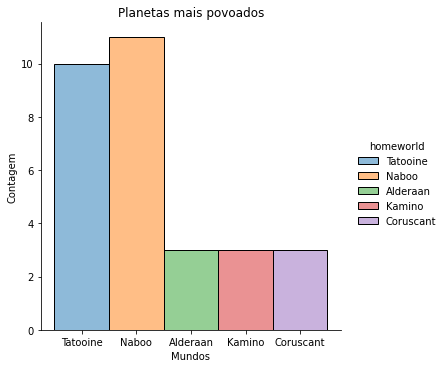

In [ ]:
sns.displot(data=df5, x='homeworld', kind='hist', hue='homeworld').set(title='Planetas mais povoados')
plt.xlabel('Mundos')
plt.ylabel('Contagem')
plt.show()

Em nossa primeira análise deste dataset, notamos que Tatooine e Naboo são os mundos mais povoado de espécies, são elas:

1.  **Tatooine**: Temos a presença de *Human* e *Droid*

2.   **Naboo**: Temos a presença de *Droid*, Human e provavelmente nativos *Gungan*

Enquanto os outros mundos tem uma frequencia de espécies um pouco menor ou apenas uma única espécie detectada, como é caso de **Alderaan**, creio que devido ao **estado natural** de cada mundo e as adaptações que as espécies possuem para sobreviver.
Logo vemos que **Kamino** e **Coruscant** ja possuem espécies mais predominantes.

In [ ]:
df.loc[df['homeworld'] == 'Tatooine']['species'].value_counts()

Human    8
Droid    2
Name: species, dtype: int64

In [ ]:
df.loc[df['homeworld'] == 'Naboo']['species'].value_counts()

Human     5
Gungan    3
Droid     1
Name: species, dtype: int64

In [ ]:
df.loc[df['homeworld'] == 'Alderaan']['species'].value_counts()

Human    3
Name: species, dtype: int64

In [ ]:
df.loc[df['homeworld'] == 'Kamino']['species'].value_counts()

Kaminoan    2
Human       1
Name: species, dtype: int64

In [ ]:
df.loc[df['homeworld'] == 'Coruscant']['species'].value_counts()

Human         2
Tholothian    1
Name: species, dtype: int64

In [ ]:
df.loc[df['homeworld'] == 'Tatooine']['species'].value_counts()

Human    8
Droid    2
Name: species, dtype: int64

In [ ]:
# Está foi outra tentativa que encontrei para para trazer referente a todos os mundos
df.groupby(['homeworld','species'])['name'].count()

Nossas técnicas utilizadas aqui foram o **groupby** onde tudo foi agrupado pela coluna especificada e o **.loc** onde eu fiz referencia a qual coluna estava buscando e qual mundo eu iria trazer as informações de espécies e trazendo a quantidade cada.

--------------------------------------------------------------------------------

## **PART FINAL**

--------------------------------------------------------------------------------


Nesta parte da nossa análise, iremos ter uma pequena ideia de como é o mundo do nosso **TOP5**, desta forma poderemos fazer algumas comparações e possivelmente compreender o motivo *real*, para isso utilizaremos outra parte deste dataset que foi nomeado como **"planets"**.

In [ ]:
# Vou nomear esse DataFrame como DFP como menção à planetas, em seguida vamos entender o que faz parte desse DF

dfp = pd.read_csv('/content/planets.csv', sep=',')

In [ ]:
dfp.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09
1,Yavin IV,24.0,4818.0,10200.0,"temperate, tropical",1 standard,"jungle, rainforests",8.0,1.000000e+03
2,Hoth,23.0,549.0,7200.0,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100.0,NaN
3,Dagobah,23.0,341.0,8900.0,murky,NaN,"swamp, jungles",8.0,NaN
4,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06


Com a visualização do nosso **dataset**, ja podemos ver algumas informações que para nós teria uma relevancia, tais como:

*   **climate**: *Para entedermos o tipo de clima do planeta*
*   **terrain**: *Para entendermos o tipo geografico do planeta*
*   **surface_water**: *Para entendermos o quanto de água o planeta possui*
*   **rotation_period**: *Para entendermos como funciona rotação do planeta, desta forma conseguiriamos ver se o planeta passa mais tempo no claro ou escuro.*


Seguiremos com esta análise para complementar o que foi feito aqui



In [ ]:
# Vamos entender um pouco o nosso TOP2 planetas que foram listado como mais populosos e indentificar o motivo disso.
dfp.get(dfp['name'] == 'Tatooine')

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
59,Tatooine,23.0,304.0,10465.0,arid,1 standard,desert,1.0,200000.0


In [ ]:
dfp.get(dfp['name'] == 'Naboo')

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
6,Naboo,26.0,312.0,12120.0,temperate,1 standard,"grassy hills, swamps, forests, mountains",12.0,4.500000e+09


Utilizando o metodo **.get**, busquei e uma coluna especifica definida como **'name'** e especifiquei quais planetas queria pelo seu nome.

Logo de cara percebemos que **Naboo** possui uma região coberta por água muita do que **Tatooine**, até mesmo sua população total reflete essa diferença.

Definindo um variavel **rot** abreviação de rotation, indiquei um codigo para que ele pudesse um realizar uma soma, caso encontra-se mesmos valores. 

In [ ]:
rot = dfp.groupby(['name']).agg({"rotation_period": "sum"})
rot

,rotation_period
name,
Alderaan,24.0
Aleen Minor,0.0
Bespin,12.0
Bestine IV,26.0
Cato Neimoidia,25.0
Cerea,27.0
Champala,27.0
Chandrila,20.0
Concord Dawn,0.0


Entendendo a "rotation_period" como rotaçãos dos planetas, onde podemos entender quanto tempo leva para completar rotação, entendendo que temos dias e noites mais longas. 

In [ ]:
# Quis verificar quantas linhas temos nessa variavel feita, a informação se da como (60 linhas, 1 coluna)
rot.shape

(60, 1)

Devido a extensão de informações, para melhorar nossa visualização os campos vazios irei aplicar um dropNA para que possamos elimina-los

In [ ]:
dfp.loc[dfp['name'] == 'Tatooine']['rotation_period']

59    23.0
Name: rotation_period, dtype: float64

Tatooine tem o dia e noite mais curtos

In [ ]:
dfp.loc[dfp['name'] == 'Naboo']['rotation_period']

6    26.0
Name: rotation_period, dtype: float64

E Naboo possui dias bem mais longos que o comum.

________________________________________________________________________________

Afim de demonstrar graficamente, um vislumbre de como alguns planetas possui essa rotação é maior do que imaginavamos, fiz o plt abaixo.

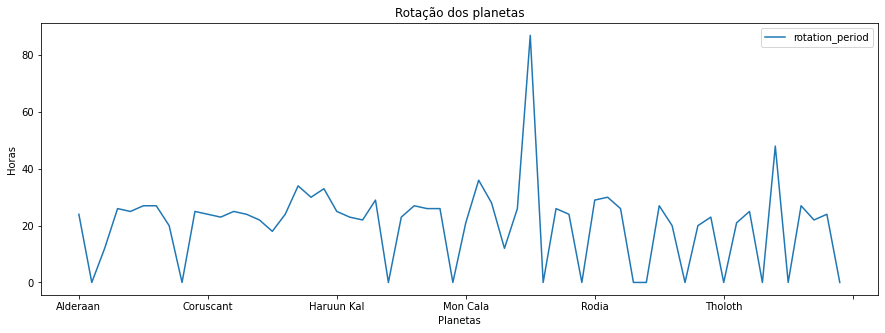

In [ ]:
rot.plot(figsize=(15,5)).set(title='Rotação dos planetas')
plt.xlabel('Planetas')
plt.ylabel('Horas')
plt.show()

Eu Caio Rodrigues, encerro meu primeiro projeto voltado análise de dados com o tema de StarWars, um pouco geek que sou com certeza, foi bem confortável gerar esse tipo de insight. 